In [123]:
import numpy as np
from scipy.optimize import minimize, least_squares
import matplotlib.pyplot as plt

In [124]:
a = -1.8
b = 2
n = 20

In [125]:
x = np.linspace(a, b, n)
e = np.random.normal(0, 1, n)
y = x * 2 + 2 + e

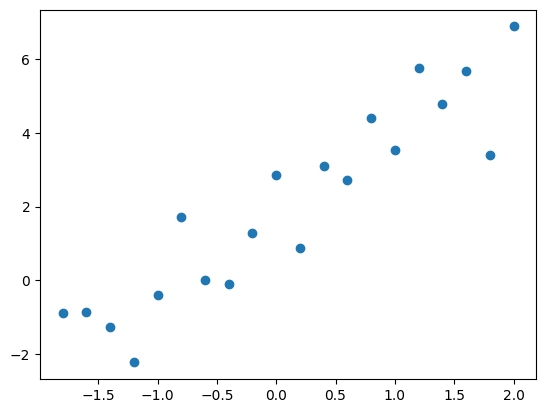

In [126]:
plt.scatter(x, y)

## Метод наименьших квадратов

In [127]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[-1.80000000e+00,  1.00000000e+00],
       [-1.60000000e+00,  1.00000000e+00],
       [-1.40000000e+00,  1.00000000e+00],
       [-1.20000000e+00,  1.00000000e+00],
       [-1.00000000e+00,  1.00000000e+00],
       [-8.00000000e-01,  1.00000000e+00],
       [-6.00000000e-01,  1.00000000e+00],
       [-4.00000000e-01,  1.00000000e+00],
       [-2.00000000e-01,  1.00000000e+00],
       [-2.22044605e-16,  1.00000000e+00],
       [ 2.00000000e-01,  1.00000000e+00],
       [ 4.00000000e-01,  1.00000000e+00],
       [ 6.00000000e-01,  1.00000000e+00],
       [ 8.00000000e-01,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 1.20000000e+00,  1.00000000e+00],
       [ 1.40000000e+00,  1.00000000e+00],
       [ 1.60000000e+00,  1.00000000e+00],
       [ 1.80000000e+00,  1.00000000e+00],
       [ 2.00000000e+00,  1.00000000e+00]])

In [128]:
b_sq, a_sq = np.linalg.lstsq(A, y, rcond=None)[0]
a_sq, b_sq

(1.8608546480117663, 2.0606678836773646)

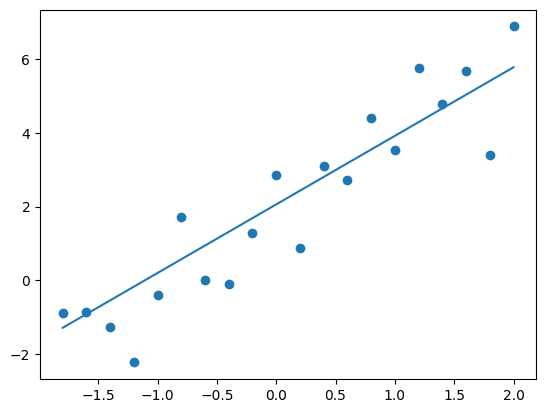

In [129]:
plt.scatter(x, y)

x_p = np.linspace(a, b, 100)
y_p = x_p * a_sq + b_sq
plt.plot(x_p, y_p)

## Метод наименьших модулей

In [130]:
def err_func(params, x, y):
  return np.sum(np.abs(params[0] + params[1] * x - y))

In [131]:
a_abs, b_abs = minimize(err_func, [0, 0], args=(x, y)).x
a_abs, b_abs

(1.769110208222535, 2.1616210605162967)

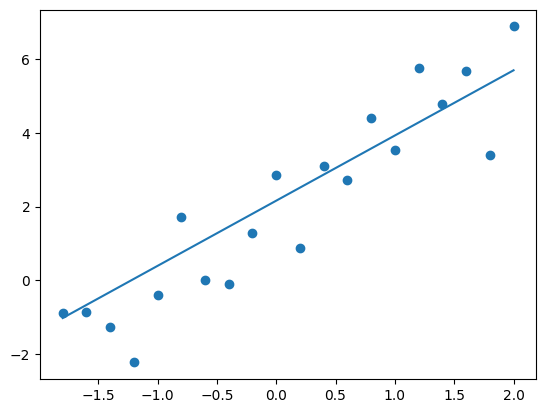

In [132]:
plt.scatter(x, y)

x_p = np.linspace(a, b, 100)
y_p = x_p * a_abs + b_abs
plt.plot(x_p, y_p)

## С возмущениями

In [133]:
y_mod = y.copy()
y_mod[0] += 10
y_mod[-1] -= 10
A_mod = np.vstack([x, np.ones(len(x))]).T

In [134]:
b_sq_mod, a_sq_mod = np.linalg.lstsq(A_mod, y_mod, rcond=None)[0]
a_sq_mod, b_sq_mod

(2.0037117908689095, 0.6320964551059368)

In [135]:
def residuals(params):
  return np.abs(params[0] + params[1] * x - y_mod)

In [136]:
a_abs_mod, b_abs_mod = minimize(err_func, [0, 0], args=(x, y_mod)).x
a_abs_mod, b_abs_mod

(1.6683906819672636, 1.9902673842521028)

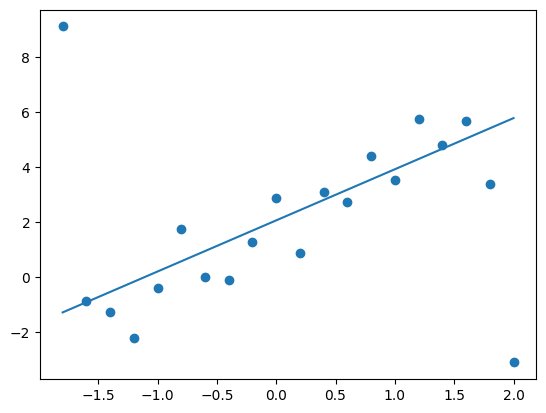

In [137]:
plt.scatter(x, y_mod)

x_p = np.linspace(a, b, 100)
y_p = x_p * a_sq + b_sq
plt.plot(x_p, y_p)

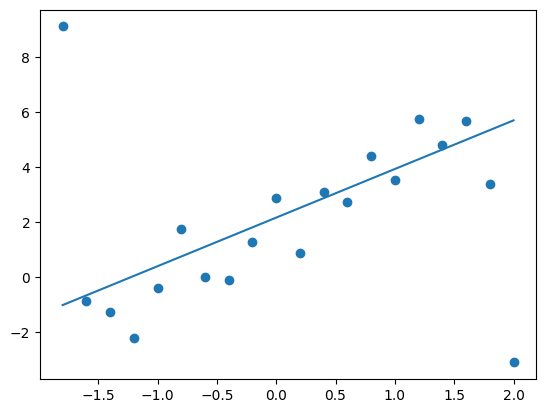

In [138]:
plt.scatter(x, y_mod)

x_p = np.linspace(a, b, 100)
y_p = x_p * a_abs + b_abs
plt.plot(x_p, y_p)